In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer
from google.colab import files



# Optional: Set plot style
sns.set(style="whitegrid")


In [3]:
import kagglehub


path = kagglehub.dataset_download("sonalisingh1411/mall-customer-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mall-customer-dataset' dataset.
Path to dataset files: /kaggle/input/mall-customer-dataset


In [17]:
# Basic dataset information
print("Shape of dataset:", df.shape)
df.info()


Shape of dataset: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
# Check missing values
df.isnull().sum()


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [33]:
df.shape


(200, 6)

In [19]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

print("Numerical Features Selected:")
numeric_df.columns


Numerical Features Selected:


Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [22]:
# Impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(numeric_df)


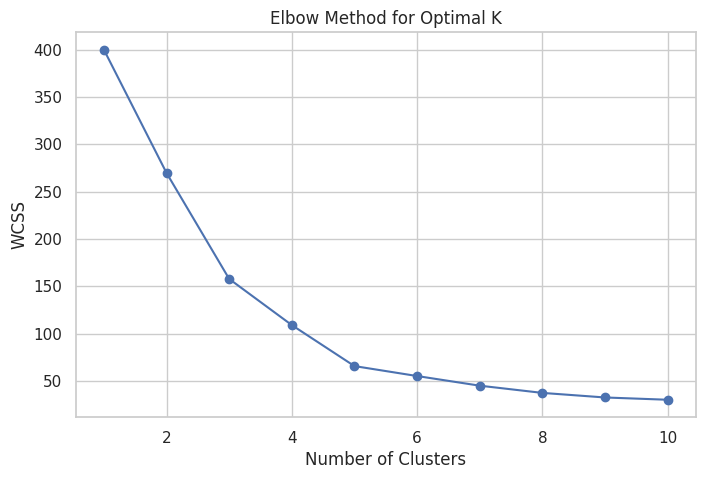

In [23]:
wcss = []

K_RANGE = range(1, 11)
for k in K_RANGE:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_RANGE, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [24]:
# Choose optimal clusters (example: 4)
k = 4

kmeans = KMeans(
    n_clusters=k,
    init='k-means++',
    n_init=20,
    max_iter=300,
    random_state=42
)

clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataset
df['Cluster'] = clusters
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [27]:
# Select numeric columns only (safe for all datasets)
numeric_columns = df.select_dtypes(include=[np.number])

# Add Cluster column back
numeric_columns['Cluster'] = df['Cluster']

# Cluster-wise numeric summary
cluster_summary = numeric_columns.groupby('Cluster').mean()
cluster_summary


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,23.00,45.217391,26.304348,20.913043
1,162.00,40.394737,87.000000,18.631579
2,70.97,39.200000,48.260000,56.480000
3,162.00,32.692308,86.538462,82.128205


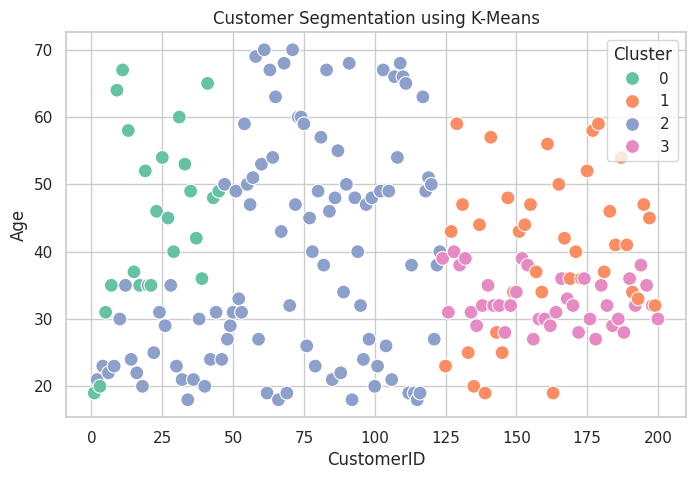

In [28]:
# Use first two numerical features for visualization
feature_x = numeric_df.columns[0]
feature_y = numeric_df.columns[1]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df[feature_x],
    y=df[feature_y],
    hue=df['Cluster'],
    palette='Set2',
    s=100
)

plt.title("Customer Segmentation using K-Means")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.show()


In [31]:
# Save clustered output
output_file = "customer_segmented_data.csv"
df.to_csv(output_file, index=False)

files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>